In [1]:
!pip install esgf-pyclient --progress-bar off

!pip install pytest --progress-bar off
 
!pip install flake8 --progress-bar off
 
!pip install sphinx --progress-bar off
 
!pip install nbsphinx --progress-bar off
 
!pip install pandoc --progress-bar off
 
!pip install ipykernel --progress-bar off
 
!pip install nbconvert --progress-bar off
 
!pip install defusedxml --progress-bar off
 
!pip install jinja2 --progress-bar off
 
!pip install requests --progress-bar off
 
!pip install webob --progress-bar off
 
!pip install myproxyclient --progress-bar off
 
!pip install nbval --progress-bar off

!pip install requests_cache==0.5 --progress-bar off

!pip install xarray --progress-bar off

In [2]:
from pyesgf.search import SearchConnection
import os
import pandas as pd
import requests
from tqdm import tqdm

import datetime as dt
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
from netCDF4 import Dataset, date2index, num2date, date2num
import xarray as xr

from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from netCDF4 import Dataset, date2index, num2date, date2num

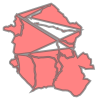

In [74]:
cities  = os.listdir('Coordonnees_contours_sous-bassins/')
all_coords_df = None
congoValues = []

for city in cities:
    data = pd.read_excel('Coordonnees_contours_sous-bassins/'+ city,usecols=['lat', 'long'] ,dtype={'lat': float, 'long': float})
    if all_coords_df is None:
        all_coords_df = data
    else:
        all_coords_df = pd.concat([data, all_coords_df]) 
        
    for row in data.iterrows():
        congoValues.append([row[1].long, row[1].lat])

CongoPolygon = Polygon(congoValues)
CongoPolygon

In [75]:
len(all_coords_df)

446

In [36]:
all_coords_df.to_csv('all_coords_df.csv', header=True)

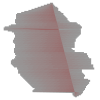

In [76]:
all_lat_long = xr.open_dataset('https://ds.nccs.nasa.gov/thredds/dodsC/bypass/NEX-GDDP/bcsd/rcp85/r1i1p1/tasmin/MIROC-ESM-CHEM.ncml')

nc_lat = all_lat_long.variables['lat'][:].data
nc_lon = all_lat_long.variables['lon'][:].data

lat_congo = []
long_congo = []
lat_long_values = []

for lat in nc_lat:
    for long in nc_lon:
        if CongoPolygon.contains(Point(long, lat)):
                long_congo.append(long)
                lat_congo.append(lat)
                lat_long_values.append([long, lat])
                 
Polygon(lat_long_values)

In [78]:
models=['inmcm4',
         'bcc-csm1-1',
         'NorESM1-M',
         'MRI-CGCM3',
         'MPI-ESM-MR',
         'MPI-ESM-LR',
         'MIROC5',	
         'MIROC-ESM',
         'MIROC-ESM-CHEM',
         'IPSL-CM5A-MR',
         'IPSL-CM5A-LR',
         'GFDL-ESM2M',
         'GFDL-ESM2G',
         'GFDL-CM3',
         'CanESM2',
         'CSIRO-Mk3-6-0',
         'CNRM-CM5',
         'CESM1-BGC',
         'CCSM4',
         'BNU-ESM',
         'ACCESS1-0']
experimets = ['rcp45', 'rcp85', 'historical']

In [80]:
for experiment in experimets:
  print(experiment)

  for model in models:

    opendap_tasmin = 'https://ds.nccs.nasa.gov/thredds/dodsC/bypass/NEX-GDDP/bcsd/' + experiment + '/r1i1p1/tasmin/'+ model +'.ncml'
    opendap_tasmax = 'https://ds.nccs.nasa.gov/thredds/dodsC/bypass/NEX-GDDP/bcsd/' + experiment + '/r1i1p1/tasmax/'+ model +'.ncml'
    opendap_pr = 'https://ds.nccs.nasa.gov/thredds/dodsC/bypass/NEX-GDDP/bcsd/' + experiment + '/r1i1p1/pr/'+ model +'.ncml'

    data_tasmin = xr.open_dataset(opendap_tasmin)
    data_tasmax = xr.open_dataset(opendap_tasmax)
    data_pr = xr.open_dataset(opendap_pr)
    
    data_tasmin = data_tasmin.sel(lon=long_congo, lat=lat_congo)
    data_tasmax = data_tasmax.sel(lon=long_congo, lat=lat_congo)
    data_pr = data_pr.sel(lon=long_congo, lat=lat_congo)
    
    data_all = xr.merge([data_tasmin, data_tasmax, data_pr])
    print(model)
    print(data_all.sizes)
 


rcp45
inmcm4
Frozen({'lat': 4155, 'lon': 4155, 'time': 34675})
bcc-csm1-1
Frozen({'lat': 4155, 'lon': 4155, 'time': 34310})
NorESM1-M
Frozen({'lat': 4155, 'lon': 4155, 'time': 34675})
MRI-CGCM3
Frozen({'lat': 4155, 'lon': 4155, 'time': 34698})
MPI-ESM-MR
Frozen({'lat': 4155, 'lon': 4155, 'time': 34698})
MPI-ESM-LR
Frozen({'lat': 4155, 'lon': 4155, 'time': 34698})
MIROC5
Frozen({'lat': 4155, 'lon': 4155, 'time': 34310})
MIROC-ESM
Frozen({'lat': 4155, 'lon': 4155, 'time': 34698})
MIROC-ESM-CHEM
Frozen({'lat': 4155, 'lon': 4155, 'time': 34698})
IPSL-CM5A-MR
Frozen({'lat': 4155, 'lon': 4155, 'time': 34675})
IPSL-CM5A-LR
Frozen({'lat': 4155, 'lon': 4155, 'time': 34675})
GFDL-ESM2M
Frozen({'lat': 4155, 'lon': 4155, 'time': 34675})
GFDL-ESM2G
Frozen({'lat': 4155, 'lon': 4155, 'time': 34675})


MemoryError: Unable to allocate 558. GiB for an array with shape (34675, 4155, 4155) and data type bool